Selected CIR indices: (1,)


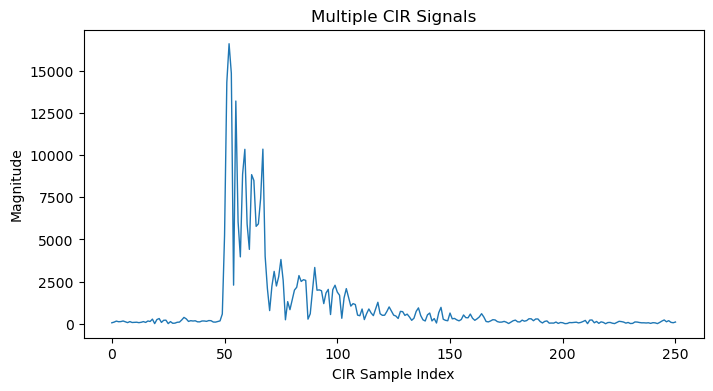

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load CIR dataset
measurement = np.load('../test/dataset/meas_symm_1.npz', allow_pickle=False)
header, data = measurement['header'], measurement['data']
data_cir = data['cirs'][:2000]  # Extract first 2000 CIRs

# Split dataset into training (60%), testing (20%), and evaluation (20%)
from sklearn.model_selection import train_test_split
trainCIR, tempCIR = train_test_split(data_cir, test_size=0.4, random_state=42)
testCIR, evalCIR = train_test_split(tempCIR, test_size=0.5, random_state=42)

# Define channels
alice_channel = 3  # Channel 3 is ALICE (legitimate)
eve_channel = 6  # Channel 6 is EVE (illegitimate)

# Extract CIRs for Alice and Eve
train_alice_cirs = trainCIR[:, alice_channel, :, :]  # Alice's CIRs
train_eve_cirs = trainCIR[:, eve_channel, :, :]      # Eve's CIRs

# Compute CIR magnitude
train_alice_magnitude = np.abs(train_alice_cirs[..., 0] + 1j * train_alice_cirs[..., 1])
train_eve_magnitude = np.abs(train_eve_cirs[..., 0] + 1j * train_eve_cirs[..., 1])

# Combine CIRs
cirs = np.vstack((train_alice_magnitude, train_eve_magnitude))

# Select a subset of CIRs to plot (for better visualization)
num_plot = 1  # Plot 50 CIRs
indices = np.random.choice(cirs.shape[0], num_plot, replace=False)
print("Selected CIR indices:", indices.shape)
# Plot multiple CIRs
plt.figure(figsize=(8, 4))

for i in indices:
    plt.plot(cirs[i], linewidth=1)  # Semi-transparent lines for overlap

plt.xlabel("CIR Sample Index")
plt.ylabel("Magnitude")
plt.title("Multiple CIR Signals")
# plt.grid(True)

plt.show()
